In [229]:
import pandas as pd
import numpy as np

In [250]:
## Open file
number_samples = 6
bracken_file=pd.read_csv(filepath_or_buffer='/Volumes/PiconCossio/biocomp_tools/MAUS/utils/all_orders_bracken_report_V3-V4.txt', 
                        delimiter='\t', skiprows=8)

,#perc,tot_all,tot_lvl,G1_1_all,G1_1_lvl,G2_1_all,G2_1_lvl,G3_1_all,G3_1_lvl,G4_1_all,G4_1_lvl,G5_1_all,G5_1_lvl,G6_1_all,G6_1_lvl,lvl_type,taxid,name
104,37.4598,66523,66523,302,302,1367,1367,35853,35853,1001,1001,1485,1485,26515,26515,O,45726,MBA03


In [231]:
import os
alpha_diversity_raw={"sample":[], "shannon":[], "simpson_reciprocal":[]}
for i in os.listdir():
    if i.startswith("G"):
        handler=open(i)
        handler=handler.readlines()
        ## select lines 0 and 3 which are Shannon and Simpson's Reciprocal Index
        alpha_diversity_raw["sample"].append(i[:4])
        alpha_diversity_raw["shannon"].append(round(float(handler[0].split(" ")[2].strip()),2))
        alpha_diversity_raw["simpson_reciprocal"].append(round(float(handler[3].split(" ")[3].strip()),2))
alpha_data=pd.DataFrame(alpha_diversity_raw)
alpha_data.sort_values(by="sample",inplace=True)

In [232]:
## compute relative abundance (RelAbun)
def compute_relative_abun (df, number_samples=6):
    for i in range(1, number_samples+1):
        i = str(i)
        df[f"G{i}_1_RelAbun"] = df[f"G{i}_1_all"]/df[f"G{i}_1_all"].sum() * 100
    return df

In [233]:
bracken_file=compute_relative_abun(df=bracken_file, number_samples=number_samples)
min_abundance=0.5
def filter_by_abundance_conditional (df, number_samples, min_abundance, min_samples):
    ## This is intended to mimic the taxa filter by abundance conditionally of qiime2
    ## Select taxa that have at least n abundance in at least n samples 
    df = df[(df.iloc[:,number_samples*-1:] >= min_abundance).sum(axis=1) >= min_samples]
    return df

bracken_file = filter_by_abundance_conditional (df=bracken_file, 
                                                number_samples=number_samples,
                                                min_abundance=min_abundance, 
                                                min_samples=2)
bracken_file=compute_relative_abun(df=bracken_file, number_samples=number_samples)

In [234]:
bracken_file

,#perc,tot_all,tot_lvl,G1_1_all,G1_1_lvl,G2_1_all,G2_1_lvl,G3_1_all,G3_1_lvl,G4_1_all,...,G6_1_lvl,lvl_type,taxid,name,G1_1_RelAbun,G2_1_RelAbun,G3_1_RelAbun,G4_1_RelAbun,G5_1_RelAbun,G6_1_RelAbun
5,13.7050,119259,0,7121,0,2258,0,23811,0,39253,...,0,O,3709,Pseudomonadales,5.396087,1.496732,26.714611,24.326200,16.261131,18.559341
86,11.4611,99733,0,6080,0,3368,0,16490,0,35072,...,0,O,46187,Burkholderiales,4.607247,2.232504,18.500858,21.735116,6.738249,22.460617
280,2.6130,22738,0,157,0,3049,0,1637,0,5469,...,0,O,46449,Enterobacterales,0.118970,2.021052,1.836622,3.389295,5.458140,3.716301
398,0.4778,4158,0,304,0,762,0,706,0,1212,...,0,O,3786,Xanthomonadales,0.230362,0.505097,0.792093,0.751111,0.377394,0.497596
531,4.7332,41188,0,7778,0,5146,0,9932,0,10852,...,0,O,2421,Rhizobiales,5.893942,3.411064,11.143149,6.725293,2.497438,3.071949
643,2.0673,17989,0,5852,0,271,0,589,0,652,...,0,O,2823,Sphingomonadales,4.434476,0.179634,0.660825,0.404063,7.366758,0.317972
730,0.4075,3546,0,733,0,342,0,650,0,644,...,0,O,2386,Caulobacterales,0.555446,0.226697,0.729264,0.399105,0.572946,0.292749
904,5.3145,46246,0,11891,0,24823,0,1713,0,1941,...,0,O,45370,Eubacteriales,9.010654,16.454110,1.921890,1.202893,3.623847,0.654289
917,3.7525,32654,0,6064,0,6945,0,11436,0,1292,...,0,O,45570,Peptostreptococcales-Tissierellales,4.595123,4.603545,12.830553,0.800689,3.685183,1.383485
978,2.3419,20379,0,4393,0,4623,0,1502,0,2853,...,0,O,45325,Christensenellales,3.328888,3.064390,1.685160,1.768085,2.747832,2.445941


In [235]:
from plotly.subplots import make_subplots
import plotly.express as px

In [236]:
bracken_file_relative_abun=bracken_file.loc[:,"name":]
fig = make_subplots(rows=2, cols=1, shared_xaxes=False)

sample_names=bracken_file_relative_abun.iloc[:,1:].columns
bracken_file_relative_abun["name"] = bracken_file_relative_abun["name"].apply(lambda x:x.strip())

# Number of bars
num_bars = len(bracken_file_relative_abun["name"])

# Generate colors using a predefined colorscale (Viridis, Cividis, etc.)
colors = px.colors.sample_colorscale('spectral', np.linspace(0, 1, num_bars))

## Composition bars
for i in range(0, len(bracken_file_relative_abun["name"])):
        fig.add_bar(name=bracken_file_relative_abun.iloc[i,0].strip(),
                        x=sample_names,y=bracken_file_relative_abun.iloc[i,1:],
                        row=2, col=1, marker=dict(color=colors[i])
                    )

## Diversity bars
width=0.4
offset=0.2
y = alpha_data["shannon"].to_list()
x_values=np.linspace(1, len(y), len(y))
fig.add_bar(name="Shannon", x=x_values,y=y, showlegend=False,
                        row=1, col=1, width=width,offset=offset,
                        text=[str(i) for i in y], textangle=360,
                    )
fig.add_bar(name="Simpson",x=x_values, y=alpha_data["simpson_reciprocal"], showlegend=False,
                        row=1, col=1, width=width,
                        text="simpson", textangle=360,
                    )

fig.update_layout(barmode='stack',
    autosize=True,
    width=1200,
    height=800,
    title_text="Relative abundance V3-V4 Kraken2-Bracken"
    )


## Composition bars

fig.update_yaxes(title_text="Relative frequency (%)", row=2, col=1)
fig.update_xaxes(title_text="Samples", row=2, col=1)

## Diversity bars
fig.update_traces(dict(base='group'), row=1, col=1, overwrite=True)
fig.update_yaxes(dict(title_text="Value", tickmode="linear", tick0=0, dtick=5), row=1, col=1, overwrite=True)
fig.update_xaxes(title_text="Alpha diversity", row=1, col=1, tickvals=x_values ,ticktext=["Shannon"] * len(y))

#fig.write_image('kraken2_barplots.png', format='png')

In [237]:
alpha_data

,sample,shannon,simpson_reciprocal
0,G1_1,4.36,33.28
1,G2_1,3.66,16.25
2,G3_1,3.92,17.26
3,G4_1,3.75,13.67
4,G5_1,4.04,19.78
5,G6_1,3.88,17.20


In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

In [239]:
duplicates=bracken_file_relative_abun["name"].duplicated()
for i in bracken_file_relative_abun[duplicates].index:
    bracken_file_relative_abun.loc[i,"name"] = bracken_file_relative_abun.loc[i,"name"] + str(i)
bracken_file_relative_abun.set_index(keys="name",inplace=True)
bracken_file_relative_abun.head()

,G1_1_RelAbun,G2_1_RelAbun,G3_1_RelAbun,G4_1_RelAbun,G5_1_RelAbun,G6_1_RelAbun
name,,,,,,
Pseudomonadales,5.396087,1.496732,26.714611,24.326200,16.261131,18.559341
Burkholderiales,4.607247,2.232504,18.500858,21.735116,6.738249,22.460617
Enterobacterales,0.118970,2.021052,1.836622,3.389295,5.458140,3.716301
Xanthomonadales,0.230362,0.505097,0.792093,0.751111,0.377394,0.497596
Rhizobiales,5.893942,3.411064,11.143149,6.725293,2.497438,3.071949


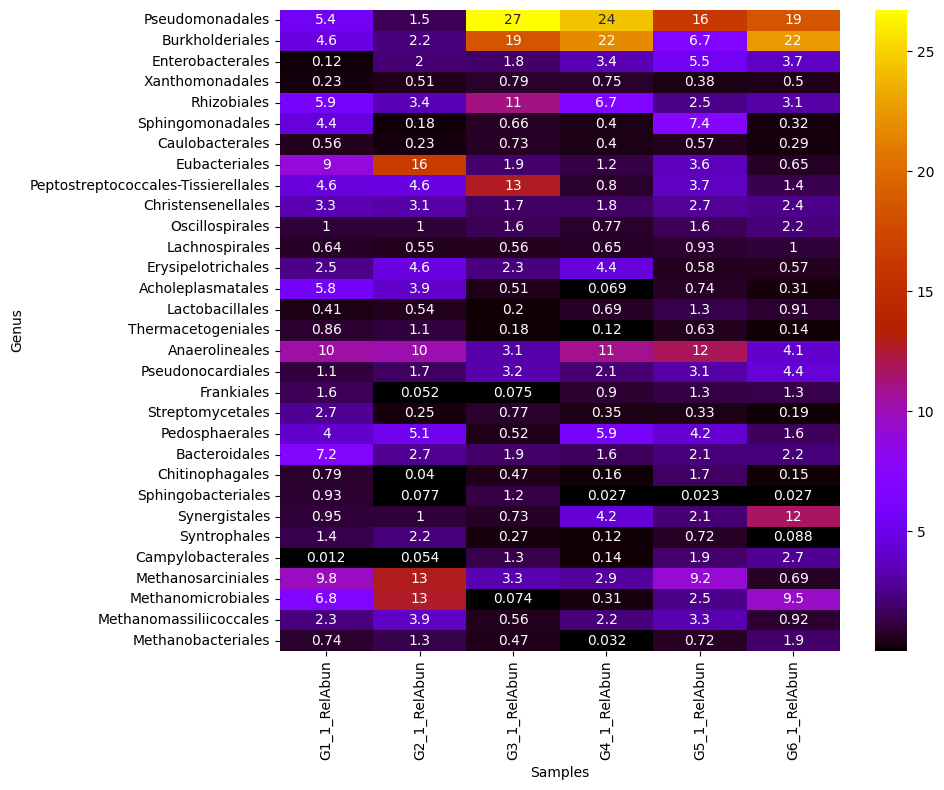

In [240]:
fig = plt.figure(figsize=(10,8))
heatmap=sns.heatmap(bracken_file_relative_abun, cmap="gnuplot", annot=True)
heatmap.set_ylabel("Genus")
heatmap.set_xlabel("Samples")
plt.xticks(rotation=90)
plt.tight_layout()
#fig.savefig('heatmap_samples_vs_genus.png', format='png', dpi=1200)

In [241]:
import re
keep_columns = re.findall("G\d+_\d+_all", " ".join(bracken_file.columns))


In [242]:
cluster=bracken_file[keep_columns + ["name"]]
cluster.iloc[:,:-1] = cluster.iloc[:,:-1].apply(lambda x: np.log10(x + 1))
cluster.set_index(keys="name", inplace=True)

<Figure size 800x800 with 0 Axes>

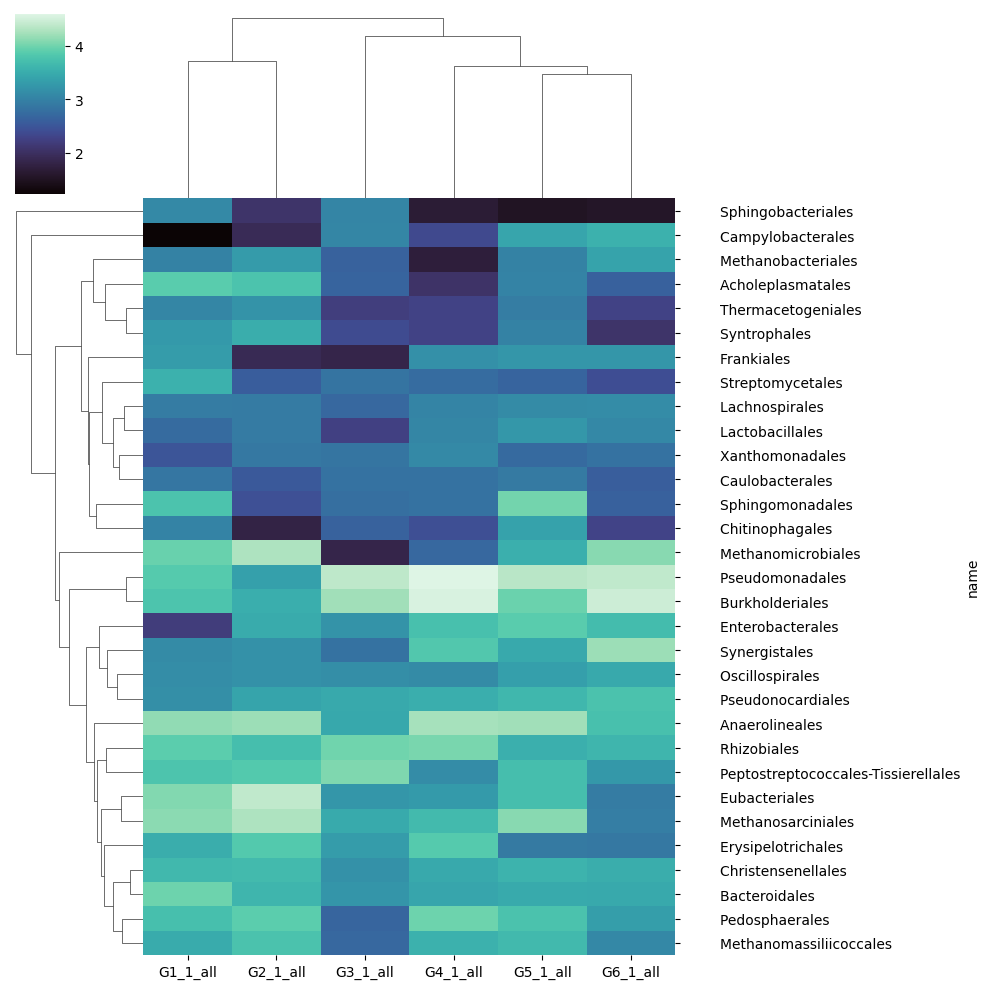

In [243]:
fig = plt.figure(figsize=(8,8))
cluster_plot = sns.clustermap(cluster, cmap="mako")
#cluster_plot.ax_row_dendrogram.remove()
#cluster_plot.savefig('clustermap_samples_vs_genus.png', format='png', dpi=1200)

# Beta diversity (Bray-Curtis with PCoA)

In [244]:
beta_matrix=pd.read_csv(filepath_or_buffer="/Volumes/PiconCossio/biocomp_tools/MAUS/utils/beta_diversity_V3-V4.txt", delimiter="\t", skiprows=6, index_col=0)
matrix=beta_matrix.to_numpy()
i_lower = np.tril_indices(matrix.shape[0], -1)  # Indices for the lower triangle
matrix[i_lower] = matrix.T[i_lower] 
matrix

array([['0.000', '0.353', '0.722', '0.589', '0.446', 0.649],
       ['0.353', '0.000', '0.704', '0.579', '0.454', 0.656],
       ['0.722', '0.704', '0.000', '0.575', '0.576', 0.55],
       ['0.589', '0.579', '0.575', '0.000', '0.407', 0.464],
       ['0.446', '0.454', '0.576', '0.407', '0.000', 0.386],
       [0.649, 0.656, 0.55, 0.464, 0.386, 0.0]], dtype=object)

In [245]:
from skbio.stats.ordination import pcoa

In [246]:
pcoa_result = pcoa(matrix, number_of_dimensions=2)

In [247]:
coordinates = pcoa_result.samples
coordinates.reset_index(inplace=True)
coordinates["index"]=coordinates["index"].astype(int)+1
coordinates

,index,PC1,PC2
0,1,-0.326168,0.051724
1,2,-0.313832,0.089571
2,3,0.325411,0.311378
3,4,0.107966,-0.149039
4,5,-0.019457,-0.115631
5,6,0.226080,-0.188004


Text(0.5, 1.0, 'Beta diversity PCoA')

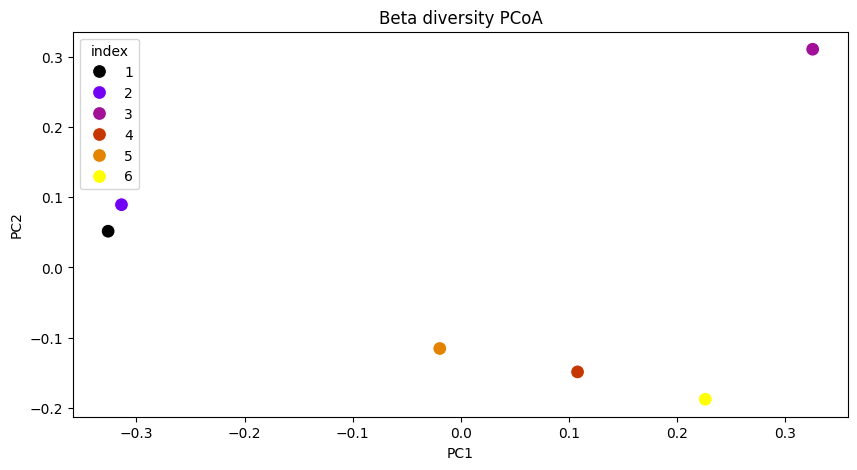

In [248]:
fig = plt.figure(figsize=(10,5))
sns.scatterplot(coordinates, x="PC1",y="PC2", hue="index", palette="gnuplot", s=100)
plt.title("Beta diversity PCoA")
#fig.savefig('Beta_diversity_PCoA.png', format='png', dpi=1200)

In [249]:
import plotly.express as px